<a href="https://colab.research.google.com/github/markiroberts/gogglecolab01/blob/main/Model0_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu121'

In [106]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(xtrain, ytrain,  c="b", s=4,   marker=".", label="Training data")
  plt.pyplot.scatter(xtest,  ytest,   c="g", s=4,  marker=".", label="Testing data")
  if predictions is not None:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions:{len(predictions)}"
    plt.pyplot.scatter(xtest, predictions,   c="r", s=4,  marker=".", label="Predictions")
  else:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions: None"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [155]:
def plot_loss(epochlist, train_losslist, test_losslist):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(epochlist, train_losslist,  c="b", s=4,   marker=".", label="Training")
  plt.pyplot.scatter(epochlist, test_losslist,   c="r", s=4,   marker=".", label="Test")
  titletext = f"Loss vs. Epoch"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

##Create device-agnostic code

This means if we've got access to a GPU, our code will use

In [5]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

Device: cuda


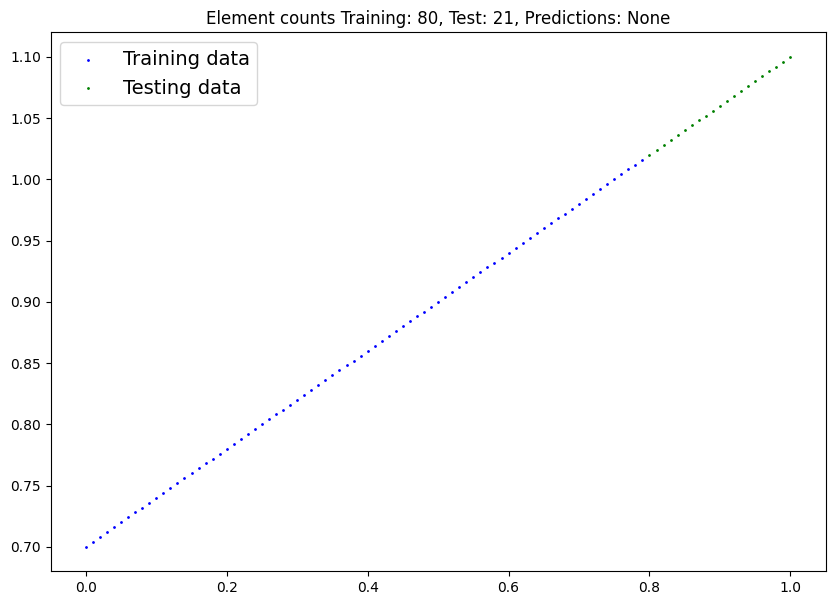

In [109]:
# Create a known graph
weight = 0.4
bias = 0.7

# Create
start = 0
step = 0.01
end = 1
# unsqueeze (dim=1) turns into a column? vector
X = torch.arange(start, end+step, step).unsqueeze(dim=1)
y = weight * X + bias

# Create training set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test   = X[train_split:], y[train_split:]

plot_predictions(X_train, y_train, X_test, y_test )

### Create a mode
use a linear model

In [116]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

Create our model

Epoch: 0
Epoch: 200
Epoch: 400
Epoch: 600
Epoch: 800
Epoch: 1000
Epoch: 1200
Epoch: 1400
Epoch: 1600
Epoch: 1800


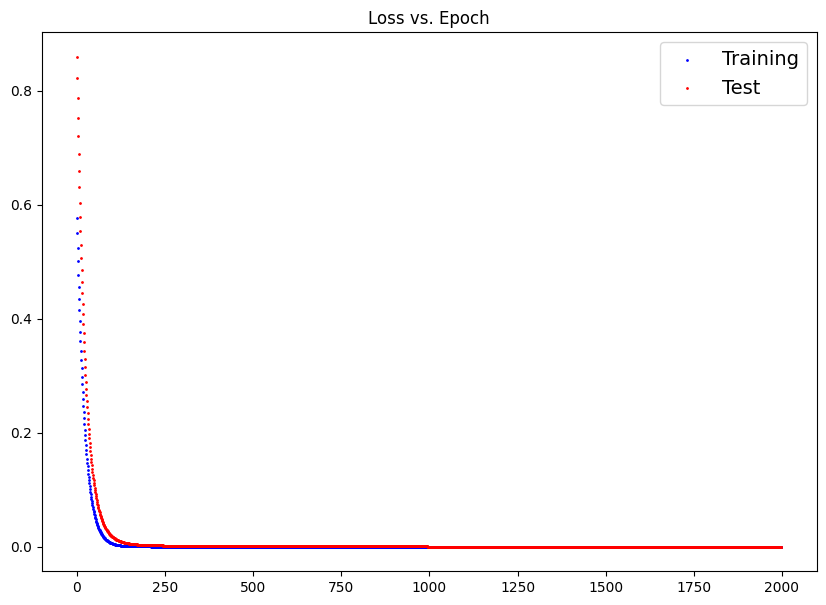

In [156]:
inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 2000
model_0 = linearRegression(inputDim,outputDim)
model_0

loss_list = []
test_loss_list = []
epoch_list = []

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=learningRate)

for epoch in range(epochs):
  if (epoch % int(epochs/10) == 0):
    print (f"Epoch: {epoch}")
  optimizer.zero_grad()
# get output from the model, given the inputs
  outputs = model_0(X_train)

# get loss for the predicted output
  loss = criterion(outputs, y_train)
# get gradients w.r.t to parameters
  loss.backward()
# update parameters
  optimizer.step()

# test model
  with torch.no_grad():
    outputs_test = model_0(X_test)
    # get loss for the predicted output
    loss_test = criterion(outputs_test, y_test)

  epoch_list.append(epoch)
  loss_list.append(loss.item())
  test_loss_list.append(loss_test.item())

plot_loss(epoch_list, loss_list, test_loss_list)
